<a href="https://colab.research.google.com/github/KachiDouglas/OOP-CW2/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df = pd.read_csv('/content/predictive_maintenance.csv')
display(df.head())

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [3]:
# Display data types and non-null values
display(df.info())

# Check for missing values
display(df.isnull().sum())

# Display descriptive statistics for numerical columns
display(df.describe())

# Display descriptive statistics for categorical columns
display(df.describe(include='object'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


None

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Target,0
Failure Type,0


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


,Product ID,Type,Failure Type
count,10000,10000,10000
unique,10000,3,6
top,L57163,L,No Failure
freq,1,6000,9652


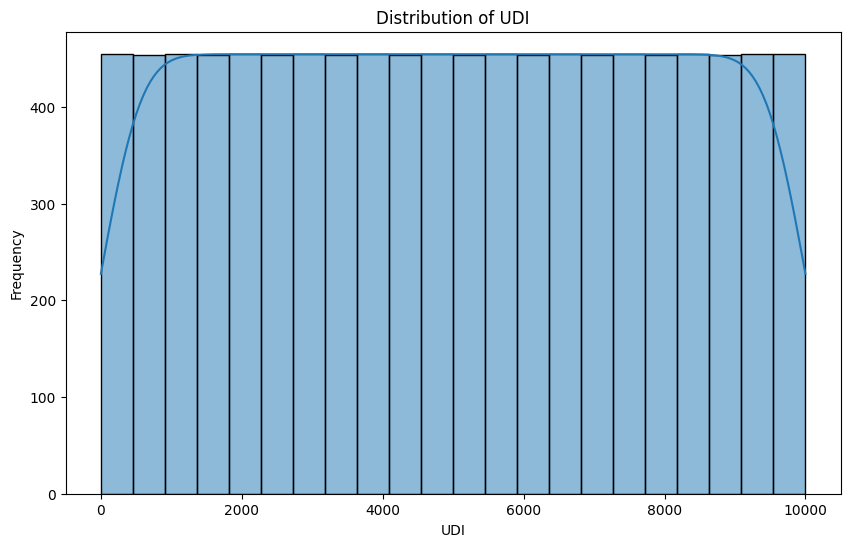

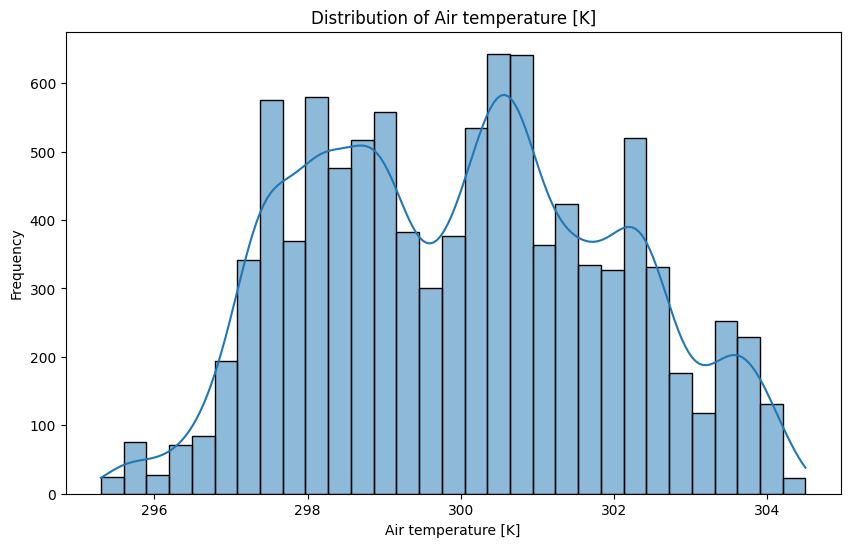

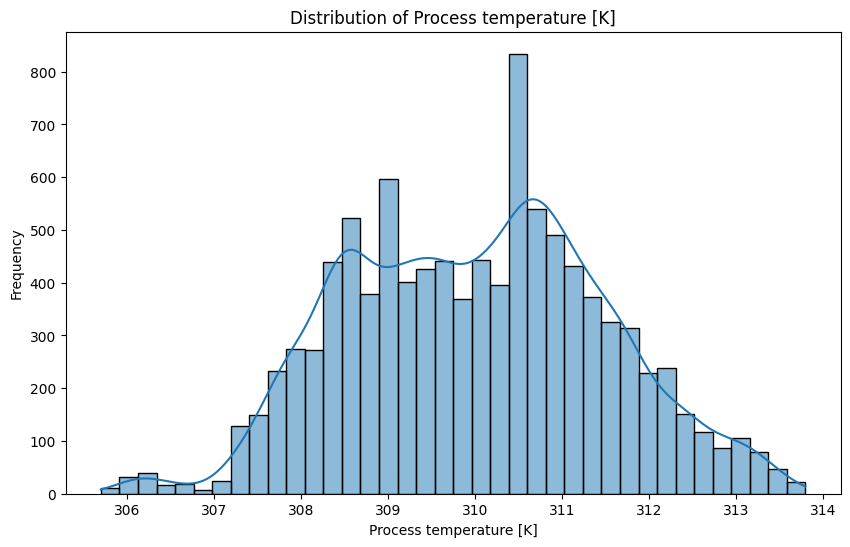

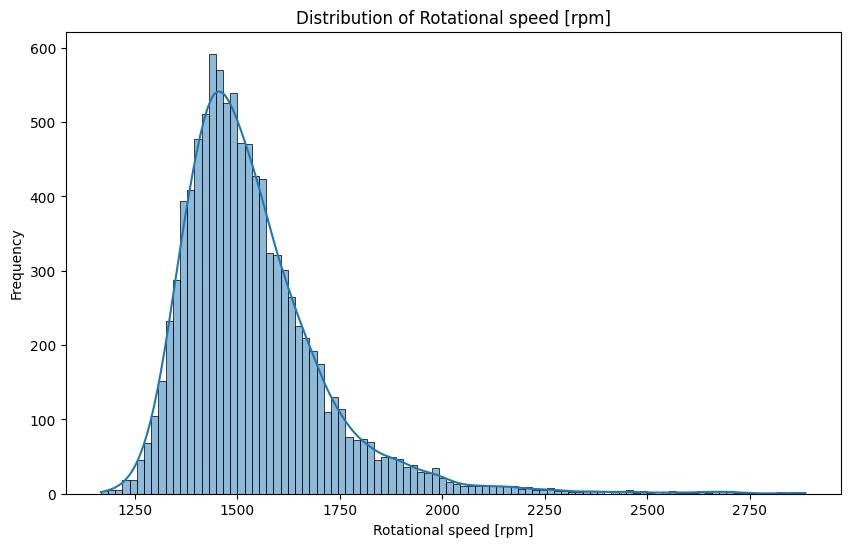

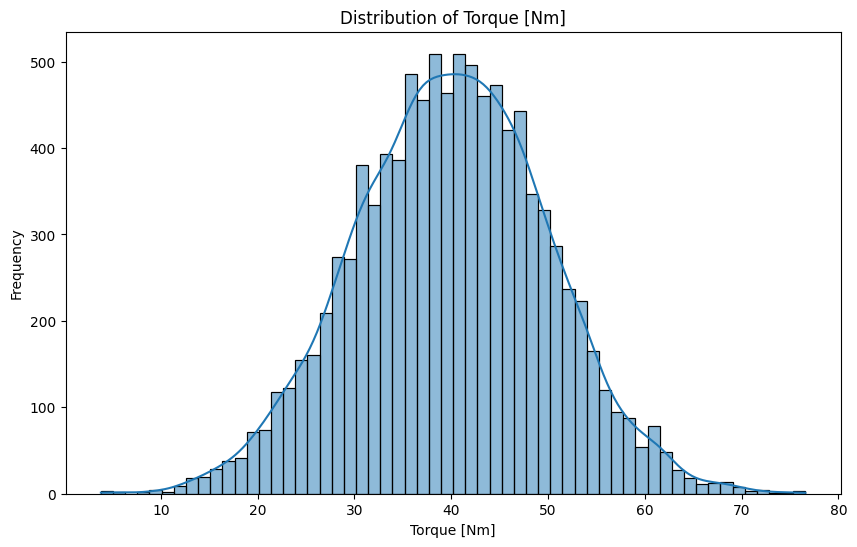

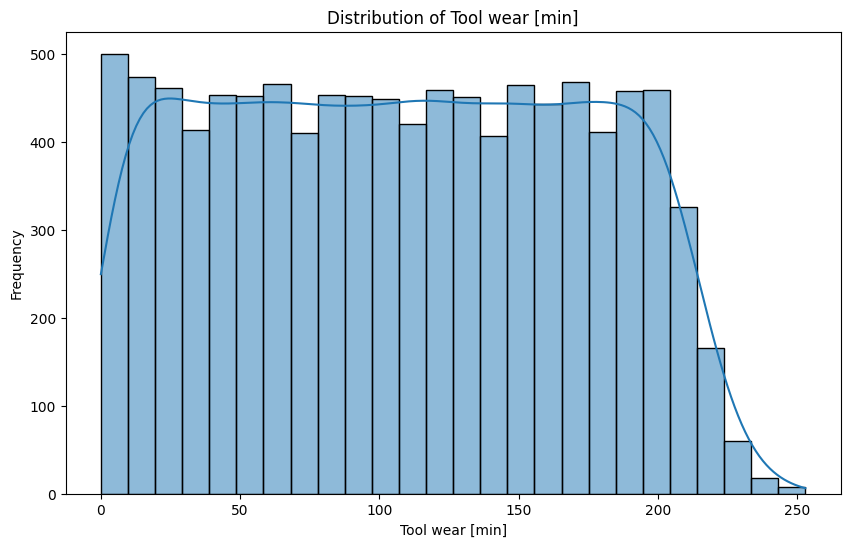

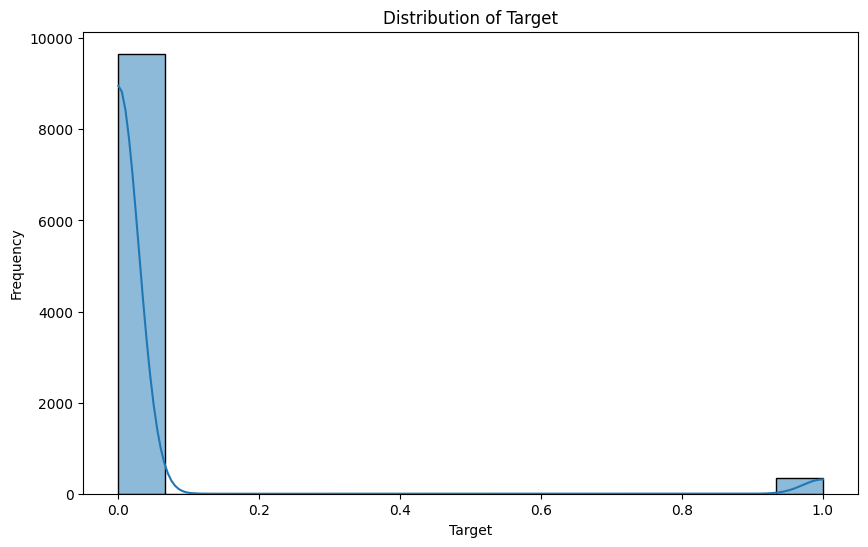

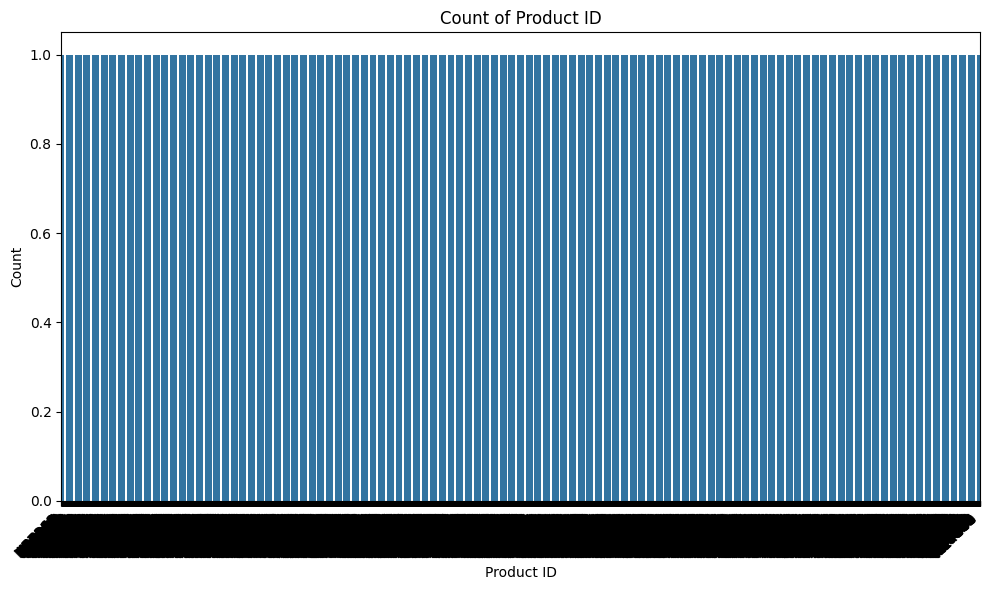

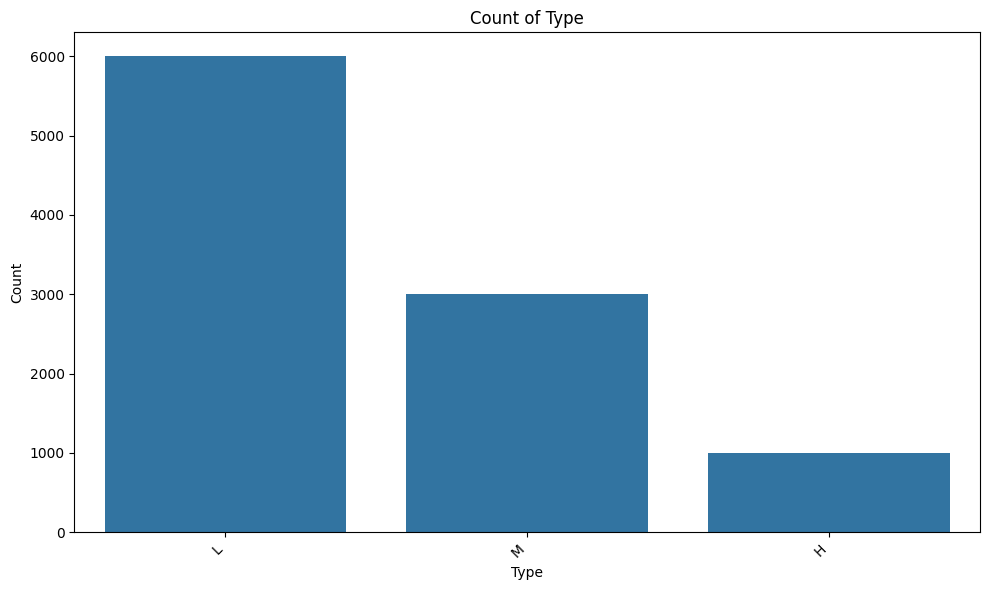

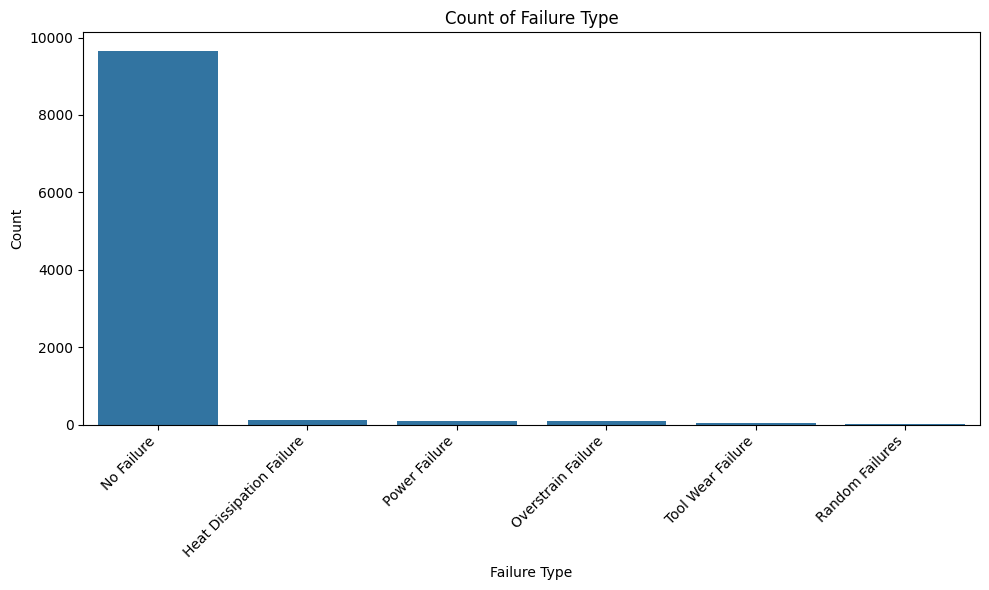

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate analysis for numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Univariate analysis for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

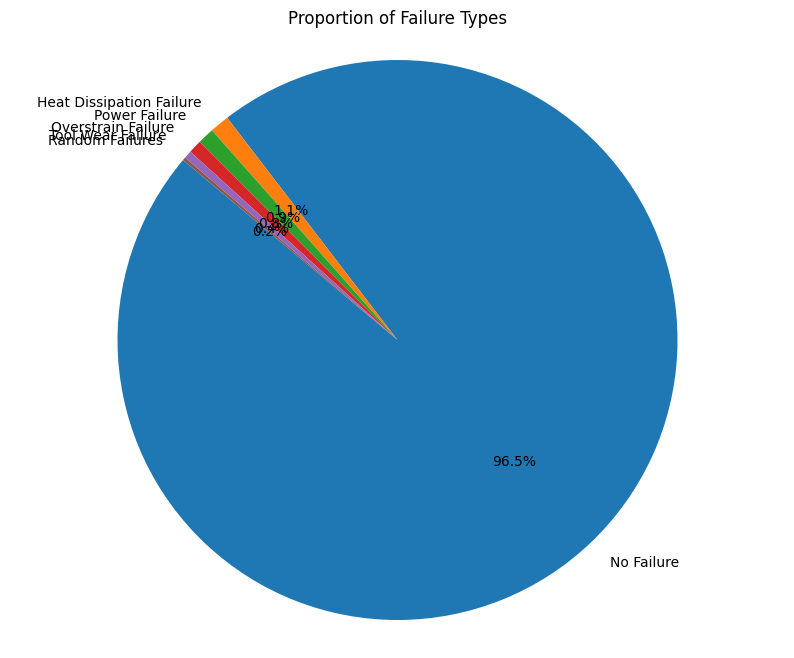

In [5]:
failure_type_counts = df['Failure Type'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(failure_type_counts, labels=failure_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Failure Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Task
Perform a predictive analysis on the dataset loaded from "/content/predictive_maintenance.csv" using pandas. The analysis should include data preprocessing, model selection, training, and evaluation, and finally making predictions.

## Data preprocessing

### Subtask:
Prepare the data for modeling, which may include encoding categorical variables, scaling numerical features, and splitting the data into training and testing sets.


**Reasoning**:
Separate features and target, identify column types, apply one-hot encoding and standard scaling, and finally combine the preprocessed features and split the data into training and testing sets.



In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features (X) and target (y)
X = df.drop(['Target', 'Failure Type'], axis=1)
y = df['Target']

# Identify categorical and numerical columns, excluding identifiers
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Product ID') # Exclude Product ID
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols.remove('UDI') # Exclude UDI

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Create a preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply preprocessing to the features
X_preprocessed = preprocessing_pipeline.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(8000, 8)

(2000, 8)

(8000,)

(2000,)

## Model selection

### Subtask:
Choose an appropriate predictive model based on the nature of the problem (e.g., classification for predicting failure).


**Reasoning**:
Determine the task type and choose a suitable classification model.



In [7]:
# 1. Determine the type of machine learning task based on the target variable 'Target'.
# The target variable 'Target' is a binary variable (0 or 1), indicating whether a failure occurred or not.
# This makes the task a binary classification problem.

# 2. Based on the task type, select a suitable classification model algorithm.
# Given the nature of the problem and the dataset size (10000 entries),
# several classification models could be suitable. A good starting point is a
# Logistic Regression model, which is simple, interpretable, and effective for
# binary classification. Other options include RandomForestClassifier or GradientBoostingClassifier
# for potentially higher accuracy, but Logistic Regression is a reasonable first choice
# for its simplicity and speed.

from sklearn.linear_model import LogisticRegression

# 3. Provide a brief justification for the chosen model.
# Logistic Regression is chosen as a suitable model for this binary classification task
# because it is a simple yet powerful algorithm that can provide a good baseline performance.
# It models the probability of the target variable belonging to a particular class,
# making it suitable for predicting the likelihood of a machine failure. Additionally,
# it is computationally efficient and its results are relatively easy to interpret.

## Model training

### Subtask:
Train the selected Logistic Regression model using the training data (`X_train`, `y_train`).


**Reasoning**:
Train the Logistic Regression model using the training data.



In [8]:
from sklearn.linear_model import LogisticRegression

# Instantiate a Logistic Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LogisticRegression()

## Model evaluation

### Subtask:
Evaluate the performance of the trained Logistic Regression model using appropriate metrics on the testing data (`X_test`, `y_test`).


**Reasoning**:
Import necessary evaluation metrics, make predictions on the test set, calculate evaluation metrics, and print the results.



In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')

Accuracy: 0.9735
Precision: 0.6667
Recall: 0.2623
F1-score: 0.3765
ROC AUC Score: 0.6291


## Prediction

### Subtask:
Use the trained Logistic Regression model to make predictions on the testing data (`X_test`).


**Reasoning**:
Use the trained model to make predictions on the test set as instructed.



In [10]:
# Use the trained model to make predictions on the testing data
y_pred = model.predict(X_test)

# Display the first few predictions and their shape
display(y_pred[:10])
display(y_pred.shape)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

(2000,)

## Summary:

### Data Analysis Key Findings

*   The dataset was split into training (8000 samples) and testing (2000 samples) sets.
*   The preprocessed feature matrix has 8 columns after including one-hot encoded categorical features and scaled numerical features.
*   A Logistic Regression model was chosen for the binary classification task.
*   The trained Logistic Regression model achieved an accuracy of 0.9735 on the test set.
*   The model's precision was 0.6667, recall was 0.2623, and the F1-score was 0.3765.
*   The ROC AUC score for the model was 0.6291.
*   Predictions were successfully generated for the test set.

### Insights or Next Steps

*   The low recall and moderate F1-score indicate that while the model is relatively precise when it predicts a failure, it misses a significant number of actual failures. This suggests that the model might be too conservative in predicting the positive class (failure).
*   Further steps could involve exploring more complex models (e.g., RandomForest, Gradient Boosting) or techniques to address class imbalance, given the likely low occurrence of failures in a predictive maintenance dataset, to improve the model's ability to detect actual failures (increase recall).
